p - order of autoregressive term
d - number of differencing in order to make a time series stationary
q - order of the moving average term

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline


In [2]:
df = pd.read_csv("predict.csv")

df.head(5)

df = df[["Rainfall"]].copy()
df.describe()


,Rainfall
count,180.000000
mean,7.183111
std,10.205089
min,0.000000
25%,0.187500
50%,2.700000
75%,11.350000
max,62.850000


Now how to check if our data is stationary


We have a test called Augmented Dickey Fuller test - ADF test
It tries to prove the null hypothesis wrong. Where the null hypothesis is that the time series is stationary

So below if p>0.05 it means, it is not stationary and we will need to find the order of differencing

In [3]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df.Rainfall.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -1.783568640773671
p-value: 0.38864937906373365


if the time order is already stationary, then d=0

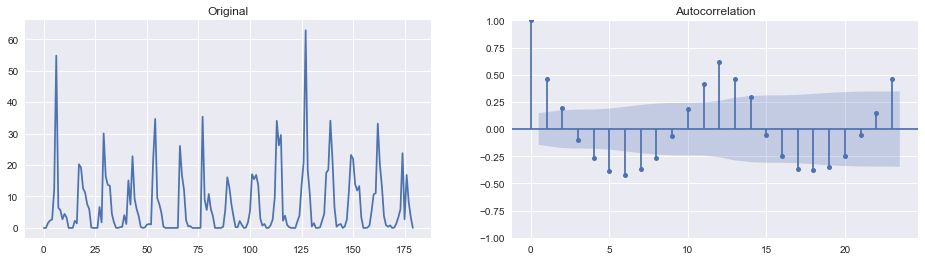

In [4]:
from statsmodels.graphics.tsaplots import plot_acf

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(df.Rainfall)
ax1.set_title("Original");
plot_acf(df.Rainfall, ax=ax2);

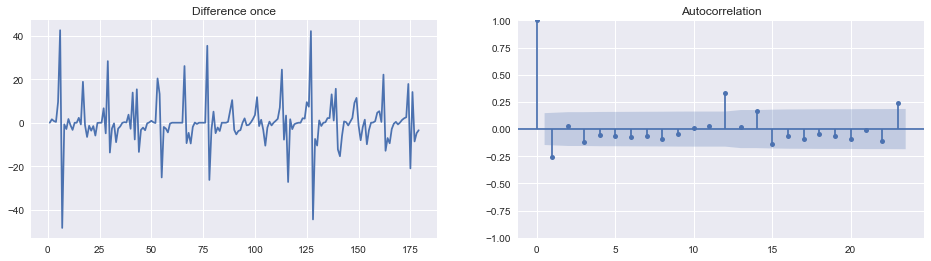

In [8]:
diff = df.Rainfall.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once");
plot_acf(diff, ax=ax2);

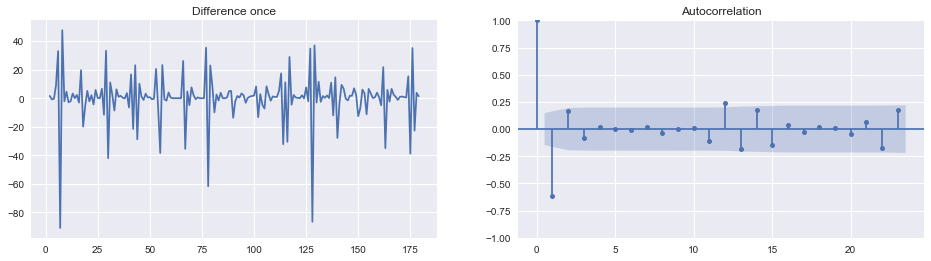

In [7]:
diff = df.Rainfall.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once");
plot_acf(diff, ax=ax2);

d = how many terms are required to remove any type of autocorrelation


Above if you see, when we differentiated it more than once the autocorrelation went to the negative side
more than the previous one when we differentiated only once

This means we overdifferentiated this and hence we will consider d=1

we can use the pmdarima package to get the number of differencing, to confirm the value of d

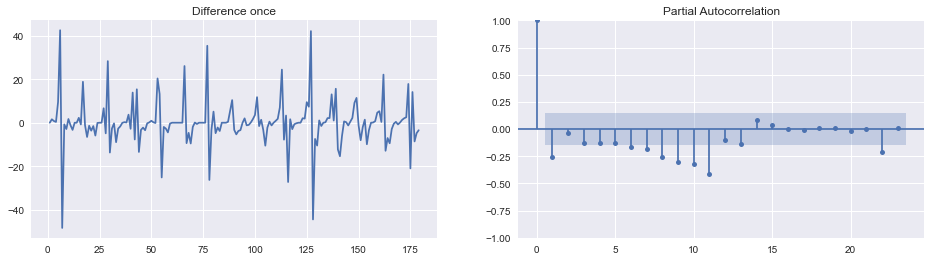

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf

diff = df.Rainfall.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_pacf(diff,ax=ax2);

we can use the pmdarima package to get the number of differencing


#!pipenv install --skip-lock pmdarima

from pmdarima.arima.utils import ndiffs

ndiffs(df.close, test="adf")

 
this will help us to get the value of d directly instead of checking the plot and 
selecting the value manually

you can check the api reference for pmdarima



p is the order of the AR term. It refers to the number of lags to be  used as predictors.
We can find out the required number of AR terms by inspecting the partial autocorrelationplot
The partial autocorrelation represent the correlation between the series and its lags

from statsmodels.graphics.tsaplots import plot_pacf

diff = df.close.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))
ax1.plot(doff)
ax1.set_title("Difference once")
ax2.set_ylin(0,1)
plot_pacf(diff,ax=ax2)

Check which point well lies about the significant line

Therefore i will choose the value of 
p=11

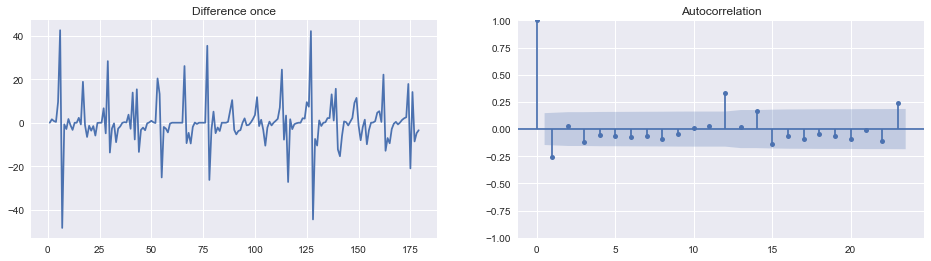

In [18]:
diff = df.Rainfall.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff, ax=ax2);


p=11 q = 3 d = 1